Part I)    Perceptrons by hand

In [67]:
import numpy, random, os
lr = 1 #learning rate
bias = 1 #value of bias
weights = [random.random(),random.random(),random.random()] #weights generated in a list (3 weights in total for 2 neurons and the bias)

In [68]:
def Perceptron(input1, input2, output) :
   outputP = input1*weights[0]+input2*weights[1]+bias*weights[2]
   if outputP > 0 : #activation function (here Heaviside)
      outputP = 1
   else :
      outputP = 0
   error = output - outputP
   weights[0] += error * input1 * lr
   weights[1] += error * input2 * lr
   weights[2] += error * bias * lr

In [69]:
for i in range(50) :
   Perceptron(3,1,1) #True or true
   Perceptron(0,1,1) #True or false
   Perceptron(3,0,1) #False or true
   Perceptron(0,0,0) #False or false

In [70]:
outputP = 1/(1+numpy.exp(-outputP)) #sigmoid function
print(outputP)
print("The weights w1, w2 and w3 are:")
print(weights[0])
print(weights[1])
print(weights[2])

0.6590867038962526
The weights w1, w2 and w3 are:
0.10291698615235012
0.5468979362714482
-0.03841390690561686


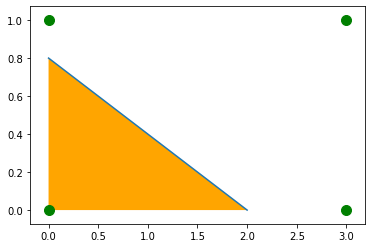

In [71]:
import numpy as np
import matplotlib.pyplot as plt


x = [3,0,3,0]
y = [1,1,0,0]

point1 = [2, 0]
point2 = [0, 0.8]

x_values = [point1[0], point2[0]]

y_values = [point1[1], point2[1]]

plt.plot(x_values, y_values)

plt.fill_between(x_values, y_values, 0,
                 facecolor="orange")  

  
plt.scatter(x, y, color= "green",  
            marker= "o", s=100)

After trying to use python for perceptron calculations for Q1, I decided to do them by hand, adding this to the submission for my reference as I'd like to try using python again. Images for calculations done by hand are attached with this submission


![](Q1.jpg)

![](Q2.jpg)

![](Q3.jpg)

![](Q4.jpg)

![](Q5.jpg)

These images will also be uploaded as part of the submission

II) Part 2: Rosenblatt’s Algorithm


In [792]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston

In [793]:
boston = load_boston()

In [794]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [795]:
df = pd.DataFrame(boston.data, columns = boston['feature_names'])

In [796]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [797]:
df['MEDV'] = boston.target

In [798]:
df['highPriced'] = df['MEDV'] > 40

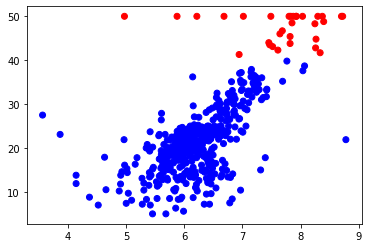

In [799]:
plt.scatter(df['RM'], df['MEDV'], c = df['highPriced'].map({True: 'red', False: 'blue'}))

As we can observe form this plot, the data for RM and MEDV is linearly seperable using a line with almost parallel to the x-axis

In [800]:
X = np.ones((len(df),3))
X[:, 1:] = df[['RM', 'MEDV']].values
X

array([[ 1.   ,  6.575, 24.   ],
       [ 1.   ,  6.421, 21.6  ],
       [ 1.   ,  7.185, 34.7  ],
       ...,
       [ 1.   ,  6.976, 23.9  ],
       [ 1.   ,  6.794, 22.   ],
       [ 1.   ,  6.03 , 11.9  ]])

In [801]:
X.shape

(506, 3)

In [802]:
y = df['highPriced'].values
y.astype(int)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [803]:
def perceptron(X,y, num_iter,step,w):
    features = X
    labels = y
    
    # set weights and bias to 0
   
    bias = 0
    
    misclassified_ = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            
            delta = (label - target)*step
            
            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)
                w[0] += delta
        
        misclassified_.append(misclassified)
        
    return (w, misclassified_)




In [840]:
import random
random.seed(100)
w = np.random.rand(X.shape[1])             
num_iter = 25010
step = 0.01


In [841]:
w_final, misclassified_ = perceptron(X,y, num_iter,step,w)

In [842]:
print(misclassified_[num_iter-1])
print(w_final)

0
[-105.51300154  -12.0885887     4.96627801]


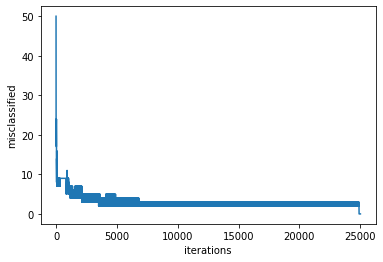

In [843]:
import matplotlib.pyplot as plt

epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

We see that the algorithm converges at approximately 25K iterations for a step size of 0.01.From the graph of errors vs iterations we see that after 5K it becomes almost flat. The gradient descent would generate a plot of errors vs iteration (epoch) that looks similar to this.

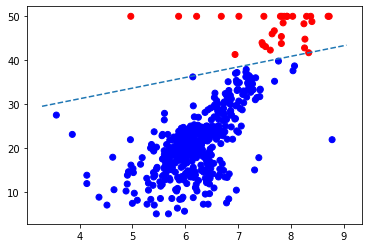

In [882]:
plt.scatter(df['RM'], df['MEDV'], c = df['highPriced'].map({True: 'red', False: 'blue'}))
m = (21.27-0)/(0-(-8.8))
import matplotlib.pyplot as plt 
import numpy as np    

def abline(m, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + m * x_vals
    plt.plot(x_vals, y_vals, '--')

abline(m,21.55)


From the graph above we can see that the line divides the data almost to the t with some points lying on the seperation line

III) Out of the box Neural Network


In [1060]:
%matplotlib inline

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, classification_report

from sklearn.neural_network import MLPRegressor

np.set_printoptions(precision=2)
np.random.seed(0)

#Function to evaluate  models
def evaluate_model(model, scaling, poly_degree=False):

    if poly_degree:
        poly = PolynomialFeatures(degree=poly_degree)
        X_train_poly = poly.fit_transform(X_train)    
        X_test_poly = poly.transform(X_test)
        if scaling:
            # scale both X_train and X_test with scaler fitted on X_train
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_poly)
            X_test_scaled = scaler.transform(X_test_poly)
        else:
            X_train_scaled = X_train_poly
            X_test_scaled = X_test_poly
    else:
        if scaling:
            # scale both X_train and X_test with scaler fitted on X_train
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test

    # fit the model with X_train_scaled, y_train
    model.fit(X_train_scaled, y_train)

    # predict the test labels
    prediction = model.predict(X_test_scaled)

    # evaluate the model
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)

    print('Train Score: '+ str(train_score))
    print('Test Score:' + str(test_score))
    print('')

    return model

In [1061]:
boston = load_boston()
X_boston = boston['data']
y_boston = boston['target']
feature_names = boston['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, random_state=1,test_size=0.2)

In [1062]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


SINGLE LAYER MLP WITH 2,5,10,20,50 NEURONS :

In [984]:
model = MLPRegressor(hidden_layer_sizes=(2,),max_iter=1000)
trained_model = evaluate_model(model, scaling=True)

Train Score: 0.6958187464895971
Test Score:0.6814684196404402



/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [985]:
model = MLPRegressor(hidden_layer_sizes=(5,),max_iter=1000)
trained_model = evaluate_model(model, scaling=True)

Train Score: 0.5001932744046234
Test Score:0.562219562732402



/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [986]:
model = MLPRegressor(hidden_layer_sizes=(10,),max_iter=1000)
trained_model = evaluate_model(model, scaling=True)

Train Score: 0.7602928296180407
Test Score:0.7836357411906657



/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [987]:
model = MLPRegressor(hidden_layer_sizes=(20,),max_iter=1000)
trained_model = evaluate_model(model, scaling=True)

Train Score: 0.7973058367671431
Test Score:0.8038924754842187



In [988]:
model = MLPRegressor(hidden_layer_sizes=(50,),max_iter=1000)
trained_model = evaluate_model(model, scaling=True)

Train Score: 0.8550633875833947
Test Score:0.8866838433708881



Thus we can see that the MLP performs best when it has 50 neurons in the layer. Up until 50, the prediction score increases gradually starting with a very very low score

MULTILAYER MLP WITH 2,5,10,20,50 NEURONS IN EACH OF THE TWO HIDDEN LAYERS 

In [946]:
model = MLPRegressor(hidden_layer_sizes=(2,2),max_iter=1000)
trained_model = evaluate_model(model, scaling=True)

Train Score: 0.3517007112557654
Test Score:0.4695883212811245



/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [945]:
model = MLPRegressor(hidden_layer_sizes=(5,5),max_iter=1000)
trained_model = evaluate_model(model, scaling=True)

Train Score: 0.7823653516987253
Test Score:0.7984476254926133



/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [943]:
model = MLPRegressor(hidden_layer_sizes=(10,10),max_iter=1000)
trained_model = evaluate_model(model, scaling=True)

Train Score: 0.7955096424832122
Test Score:0.8197572842151358



In [942]:
model = MLPRegressor(hidden_layer_sizes=(20,20),max_iter=1000)
trained_model = evaluate_model(model, scaling=True)

Train Score: 0.8306909608542723
Test Score:0.865959624104795



In [965]:
model = MLPRegressor(hidden_layer_sizes=(50,50),max_iter=1000)
trained_model = evaluate_model(model, scaling=True)

Train Score: 0.8552378913251066
Test Score:0.8755849418694878



When we increase the hidden layer by one, we see that two hidden layers having 50 neurons each give us the highest prediction score. The score is higher than when using a single layer

In [1016]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=1000)

In [1080]:
parameter_space = {
    'hidden_layer_sizes': [(100,100,50), (100,100), (50,100)]}

In [1081]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

/Users/miloni.desai/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=10000,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(100, 100, 50), (100, 100),
  

In [1082]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'hidden_layer_sizes': (100, 100, 50)}
0.629 (+/-0.131) for {'hidden_layer_sizes': (100, 100, 50)}
0.601 (+/-0.131) for {'hidden_layer_sizes': (100, 100)}
0.618 (+/-0.026) for {'hidden_layer_sizes': (50, 100)}


In [1041]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

n=1 # how many times to shuffle the training data
nhn_range=[50,75,100] # number of hidden neurons
nhn_scores = []
score_dict = {}
for nhn in nhn_range:
    mlp = MLPRegressor(hidden_layer_sizes=(nhn,),max_iter=10000)


    nhn_scores = []
    for _ in range(n):

        X_train = shuffle(X_train)
        score = np.sqrt(-cross_val_score(mlp, X_train, y_train, 
                    cv=5, scoring='neg_mean_squared_error')).mean()
        nhn_scores.append(score)
    score_dict[nhn] = nhn_scores

In [1042]:
print(score_dict)

{50: [10.326452684395921], 75: [9.275708094156483], 100: [9.258364369890423]}


In [1079]:
model = MLPRegressor(hidden_layer_sizes=(100,100,50),max_iter=10000)
trained_model = evaluate_model(model, scaling=True)

Train Score: 0.8801269738737343
Test Score:0.9109829913142903



After using the grid search and cross validation, we observe that by increasing the number of neurons per hidden layer and then adding a layer, add to accuracy. While increasing the iterations from 1000 and onward helped for a few cases, after a point it leads to decrease in accuracy. By tuning the hyperparameters based on the results of our gridsearch and cross validation we find that the best model has 3 hidden layers, with 100, 100 and 50 neurons respectively and iterates for 10000 iterations.